# **08 Predictive model**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Baseline model

Import packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import statsmodels.api as sm


In [2]:
# read in the cleaned data
df = pd.read_csv('../data/clean/housing_cleaned.csv')
df.head(10)

,transaction,price,transfer_date,postcode,property_type,new_build,tenure,PAON,SAON,Street,...,is_new_build_energy_band_num,outcode,log_price,log_total_floor_area,is_flat,is_leasehold,is_flat_leasehold,new_build_energy_band_num,property_type_order,property_type_order_legend
0,{3DCCB7C9-D19E-5B9D-E063-4704A8C0331E},79000,1996-11-29,S18 1QH,D,0,F,27,NaN,HOLBEIN CLOSE,...,0,S18,11.277216,5.056373,False,False,False,0,4,4 - D
1,{3DCCB7CA-8C30-5B9D-E063-4704A8C0331E},192000,2005-03-14,B44 0JR,S,0,F,56,NaN,HORNSEY ROAD,...,0,B44,12.165256,4.355041,False,False,False,0,3,3 - S
2,{3DCCB7CA-8CCC-5B9D-E063-4704A8C0331E},170000,2005-05-20,DY4 7NY,S,1,F,22,NaN,DARBYS WAY,...,4,DY4,12.043560,4.634729,False,False,False,4,3,3 - S
3,{3DCCB7C9-D364-5B9D-E063-4704A8C0331E},450000,2006-03-17,DE7 6GU,D,0,F,3,NaN,BEECH LANE,...,0,DE7,13.017005,4.060443,False,False,False,0,4,4 - D
4,{3DCCB7CA-8D25-5B9D-E063-4704A8C0331E},124950,2008-06-11,DY8 3UJ,T,0,F,76,NaN,SOUTH ROAD,...,0,DY8,11.735677,4.117898,False,False,False,0,2,2 - T
5,{3DCCB7CA-8AEF-5B9D-E063-4704A8C0331E},285000,2015-03-28,B31 2SQ,S,0,F,12,NaN,KEMSHEAD AVENUE,...,0,B31,12.560248,4.369448,False,False,False,0,3,3 - S
6,{3DCCB7CA-8E32-5B9D-E063-4704A8C0331E},282500,2015-07-18,B97 6AX,S,0,F,26,NaN,MARTON CLOSE,...,0,B97,12.551437,4.564348,False,False,False,0,3,3 - S
7,{3DCCB7CA-4BEC-5B9D-E063-4704A8C0331E},322500,2015-07-23,ST5 3AF,D,0,F,25,NaN,CLAYTON ROAD,...,0,ST5,12.683862,5.214283,False,False,False,0,4,4 - D
8,{3DCCB7CA-1DDC-5B9D-E063-4704A8C0331E},241000,2015-07-25,LE67 3BY,S,0,F,1,NaN,HEADSTOCK CLOSE,...,0,LE67,12.392556,4.543295,False,False,False,0,3,3 - S
9,{3DCCB7C9-D317-5B9D-E063-4704A8C0331E},270000,2015-07-31,DE73 6RL,D,0,F,15,NaN,HILLCRESTE DRIVE,...,0,DE73,12.506181,4.442651,False,False,False,0,4,4 - D


---

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7248 entries, 0 to 7247
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   transaction                   7248 non-null   object 
 1   price                         7248 non-null   int64  
 2   transfer_date                 7248 non-null   object 
 3   postcode                      7248 non-null   object 
 4   property_type                 7248 non-null   object 
 5   new_build                     7248 non-null   int64  
 6   tenure                        7248 non-null   object 
 7   PAON                          7248 non-null   object 
 8   SAON                          371 non-null    object 
 9   Street                        7219 non-null   object 
 10  Locality                      3020 non-null   object 
 11  town_city                     7248 non-null   object 
 12  district                      7248 non-null   object 
 13  cou

In [5]:
# Use sales from 2024 onwards for the baseline model
df = df[(df['year'] >= 2024)]
# sort by date
df = df.sort_values(by='transfer_date')
df.head(10)
df.tail(10)


,transaction,price,transfer_date,postcode,property_type,new_build,tenure,PAON,SAON,Street,...,is_new_build_energy_band_num,outcode,log_price,log_total_floor_area,is_flat,is_leasehold,is_flat_leasehold,new_build_energy_band_num,property_type_order,property_type_order_legend
7232,{3DCCB7CA-4CF1-5B9D-E063-4704A8C0331E},155000,2025-08-27,ST3 5AE,T,0,F,52,NaN,HILLGREEN ROAD,...,0,ST3,11.951187,4.317488,False,False,False,0,2,2 - T
7231,{3DCCB7CA-4E21-5B9D-E063-4704A8C0331E},85000,2025-08-27,ST4 7PL,T,0,F,446,NaN,HARTSHILL ROAD,...,0,ST4,11.350418,4.317488,False,False,False,0,2,2 - T
7230,{3DCCB7CA-8B7E-5B9D-E063-4704A8C0331E},212500,2025-08-27,B45 8QS,S,0,F,34,NaN,HERONSWOOD ROAD,...,0,B45,12.266702,4.276666,False,False,False,0,3,3 - S
7235,{3DCCB7CA-8B4B-5B9D-E063-4704A8C0331E},718000,2025-08-27,B14 6AT,S,0,F,133,NaN,ALL SAINTS ROAD,...,0,B14,13.484226,5.236442,False,False,False,0,3,3 - S
7246,{3DCCB7CA-8930-5B9D-E063-4704A8C0331E},170000,2025-08-28,B36 9TZ,T,0,F,2,NaN,PIKEHORNE CROFT,...,0,B36,12.043560,4.204693,False,False,False,0,2,2 - T
7242,{3DCCB7CA-8B4F-5B9D-E063-4704A8C0331E},225000,2025-08-28,B26 3DJ,T,0,F,53,NaN,BICKLEY GROVE,...,0,B26,12.323860,4.356709,False,False,False,0,2,2 - T
7243,{3DCCB7CA-2668-5B9D-E063-4704A8C0331E},208000,2025-08-28,B13 8JT,F,0,L,52A,FLAT 6,SALISBURY ROAD,...,0,B13,12.245298,4.369448,False,False,False,0,1,1 - F
7244,{3DCCB7CA-8BF1-5B9D-E063-4704A8C0331E},170000,2025-08-28,B13 9PS,F,0,L,14,NaN,AVON DRIVE,...,0,B13,12.043560,4.290459,False,False,False,0,1,1 - F
7245,{3DCCB7C9-D2EC-5B9D-E063-4704A8C0331E},320000,2025-08-28,NG10 1PP,D,0,F,8,NaN,TEWKESBURY ROAD,...,0,NG10,12.676079,4.584967,False,False,False,0,4,4 - D
7247,{3DCCB7CA-4D3F-5B9D-E063-4704A8C0331E},250000,2025-08-29,ST13 8XF,D,0,F,3,NaN,THE WILLOWS,...,0,ST13,12.429220,4.043051,False,False,False,0,4,4 - D


In [ ]:
# test on the latest 20% of the data using the transfer_date
# sort the DataFrame by transfer_date
# make it a true datetime?
df['transfer_date'] = pd.to_datetime(df['transfer_date'])
# keep only the transfer_date for 2024 onwards
df = df[df['transfer_date'].dt.year >= 2024]

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge  # or LinearRegression

# set a relative year for a meaningful intercept
df['year_c'] = df['year'] - 2023  

# set model features
num_feats   = ['log_total_floor_area','IMD_Decile','year_c','energy_band_num']
bin_feats   = ['new_build','is_leasehold']  # pass through as 0/1
cat_feats   = ['property_type','county']

# Control category order to set baselines via drop='first'
ptype_order = ['D','S','T','F']  # baseline becomes 'D' (Detached)
county_order = [
    'WEST MIDLANDS','WARWICKSHIRE','WORCESTERSHIRE','LEICESTERSHIRE',
    'LEICESTER','STAFFORDSHIRE','DERBYSHIRE','CITY OF DERBY','STOKE-ON-TRENT'
]  # baseline becomes WEST MIDLANDS

# Build the ColumnTransformer (code suggested by Copilot)
pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='first',
                              categories=[ptype_order, county_order],
                              handle_unknown='ignore'),
         cat_feats),
        ('bin', 'passthrough', bin_feats),
    ],
    remainder='drop'
)

# End-to-end pipeline
pipe = Pipeline([
    ('pre', pre),
    ('model', Ridge(alpha=1.0))  # or LinearRegression()
])

# Fit
X = df[num_feats + bin_feats + cat_feats]
y = df['log_price']
pipe.fit(X, y)

# ---- Get feature names aligned to coefficients ----
num_names = np.array(num_feats)
cat_names = pipe.named_steps['pre'].named_transformers_['cat'].get_feature_names_out(cat_feats)
bin_names = np.array(bin_feats)
feature_names = np.concatenate([num_names, cat_names, bin_names])

coefs = pipe.named_steps['model'].coef_
coef_df = pd.DataFrame({'feature': feature_names, 'beta': coefs}) \
           .sort_values('beta', key=np.abs, ascending=False)

coef_df.head(20)


,feature,beta
6,property_type_F,-0.506871
14,county_STOKE-ON-TRENT,-0.355366
5,property_type_T,-0.326748
0,log_total_floor_area,0.208101
4,property_type_S,-0.207155
13,county_CITY OF DERBY,-0.193363
12,county_DERBYSHIRE,-0.182271
15,new_build,0.168322
11,county_STAFFORDSHIRE,-0.152021
9,county_LEICESTERSHIRE,-0.126669


In [38]:
r2 = pipe.score(X, y)
print(r2)

0.7005127939354053


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# ----------------------------------
# 1) Feature spec & preprocessing
# ----------------------------------
df = df.copy()

# Center year for a meaningful intercept
df['year_c'] = df['year'] - 2018

num_feats = ['log_total_floor_area','IMD_Decile','year_c','energy_band_num']
bin_feats = ['new_build','is_leasehold']               # 0/1 passthrough
cat_feats = ['property_type','county']                 # one-hot with explicit baselines

ptype_order  = ['D','S','T','F']  # Detached baseline (drop first)
county_order = ['WEST MIDLANDS','WARWICKSHIRE','WORCESTERSHIRE','LEICESTERSHIRE',
                'LEICESTER','STAFFORDSHIRE','DERBYSHIRE','CITY OF DERBY','STOKE-ON-TRENT']  # WEST MIDLANDS baseline

pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='first',
                              categories=[ptype_order, county_order],
                              handle_unknown='ignore'), cat_feats),
        ('bin', 'passthrough', bin_feats),
    ],
    remainder='drop'
)

# ----------------------------------
# 2) Train / Test split (time-ordered 80/20)
# ----------------------------------
if 'transfer_date' in df.columns:
    df = df.sort_values('transfer_date')

X = df[num_feats + cat_feats + bin_feats]
y = df['log_price']  # log1p(price)

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ----------------------------------
# 3) LinearRegression pipeline
# ----------------------------------
pipe = Pipeline([
    ('pre', pre),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)

# ----------------------------------
# 4) Evaluation
#    - R² on log target
#    - MAE / RMSE in £ (plain back-transform & Duan smearing)
# ----------------------------------
from numpy import expm1

y_pred_log = pipe.predict(X_test)

# R² on log target
r2_log = r2_score(y_test, y_pred_log)

# Back-transform to £ (plain)
y_test_gbp = expm1(y_test)
y_pred_gbp_plain = expm1(y_pred_log)
mae_gbp_plain  = mean_absolute_error(y_test_gbp, y_pred_gbp_plain)
rmse_gbp_plain = mean_squared_error(y_test_gbp, y_pred_gbp_plain, squared=False)

# Duan smearing (recommended for log models)
y_pred_train_log = pipe.predict(X_train)
res_log = y_train - y_pred_train_log
smear = np.mean(np.exp(res_log))  # compute on TRAIN only

# For log1p targets, the unbiased level is: np.exp(pred_log)*smear - 1
y_pred_gbp_smear = np.exp(y_pred_log) * smear - 1
mae_gbp_smear  = mean_absolute_error(y_test_gbp, y_pred_gbp_smear)
rmse_gbp_smear = mean_squared_error(y_test_gbp, y_pred_gbp_smear, squared=False)

print(f"R² (log target): {r2_log:.3f}")
print(f"MAE £ (plain back-transform):  {mae_gbp_plain:,.0f}")
print(f"RMSE £ (plain back-transform): {rmse_gbp_plain:,.0f}")
print(f"MAE £ (Duan smearing):         {mae_gbp_smear:,.0f}")
print(f"RMSE £ (Duan smearing):        {rmse_gbp_smear:,.0f}")

# ----------------------------------
# 5) Coefficients table (names aligned to transformed columns)
# ----------------------------------
pre_fitted = pipe.named_steps['pre']
lin        = pipe.named_steps['model']

num_names = np.array(num_feats)
cat_names = pre_fitted.named_transformers_['cat'].get_feature_names_out(cat_feats)
bin_names = np.array(bin_feats)
feature_names = np.concatenate([num_names, cat_names, bin_names])

coef = pd.Series(lin.coef_, index=feature_names)

coef_df = (pd.DataFrame({
            'feature': feature_names,
            'beta': coef.values,
            # % effect is most meaningful for unscaled log or dummy features; shown here for reference
            'pct_effect_vs_baseline': (np.exp(coef.values) - 1) * 100
          })
          .sort_values('beta', key=np.abs, ascending=False)
         )

print("\nIntercept (on log scale):", lin.intercept_)
print("\nTop coefficients (by |beta|):")
print(coef_df.head(15).to_string(index=False))

# ----------------------------------
# 6) P-values via statsmodels OLS on the SAME transformed design
# ----------------------------------
# Use the fitted preprocessor to transform TRAIN, then fit OLS on y_train
Xtr_design = pre_fitted.transform(X_train)                  # numpy array
Xtr_design_sm = sm.add_constant(Xtr_design)                 # add intercept


In [42]:
# Once Xtr_design_sm and y_train are numeric (and free of NaNs/inf), sm.OLS(y_train.values, Xtr_design_sm).fit() will run.
Xtr_design.dtypes

AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [ ]:

ols = sm.OLS(y_train.values, Xtr_design_sm).fit()

# Build a p-value table aligned to names (const + transformed features)
sm_names = ['const'] + feature_names.tolist()
sm_summary = pd.DataFrame({
    'feature': sm_names,
    'coef_sm': ols.params,
    'p_value': ols.pvalues
})

# Merge sklearn betas with statsmodels p-values (drop 'const' when showing feature rows)
coef_with_p = (pd.merge(
                    pd.DataFrame({'feature': feature_names, 'beta_sklearn': coef.values}),
                    sm_summary.query("feature != 'const'"),
                    on='feature',
                    how='left')
               .sort_values('beta_sklearn', key=np.abs, ascending=False))

print("\nCoefficients with p-values (statsmodels OLS on transformed features):")
print(coef_with_p.head(20).to_string(index=False))


In [ ]:
# Use only main-effect features for the baseline:
# Numeric: total_floor_area, IMD_Decile, year, new_build, is_leasehold, energy_band_num.
# Categorical: property_type (one-hot), and county (one-hot)

# Define numeric features and categorical features
feature_cols = [
    'log_total_floor_area', 
    'IMD_Decile', 
    'year', 
    'new_build', 
    'is_leasehold', 
    'energy_band_num',
    ]

# Add one-hot encoded property_type
property_type_dummies = pd.get_dummies(df['property_type'], prefix='property_type', drop_first=True)
feature_cols.extend(property_type_dummies.columns.tolist())
df = pd.concat([df, property_type_dummies], axis=1)

# Add one-hot encoded county columns
county_dummies = pd.get_dummies(df['county'], prefix='county', drop_first=True)
feature_cols.extend(county_dummies.columns.tolist())
df = pd.concat([df, county_dummies], axis=1)

In [ ]:
# Target is log_price
X = df[feature_cols]
y = df['log_price']
X.head()
y.head()

# Split data into training and testing sets
# split sets based on the latest 20%
split_index = int(len(df) * 0.8)
train = df[:split_index]
test = df[split_index:]

X_train = train[feature_cols]
y_train = train['log_price']
X_test = test[feature_cols]
y_test = test['log_price']

# Train a baseline model (Linear Regression)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Back-transform to pounds
y_test_gbp = expm1(y_test)
y_pred_gbp = expm1(y_pred)
mae_gbp  = mean_absolute_error(y_test_gbp, y_pred_gbp)
rmse_gbp = mean_squared_error(y_test_gbp, y_pred_gbp, squared=False)

r2 = r2_score(y_test, y_pred)


Mean Absolute Error (£):  49,848
Root Mean Squared Error (£): 73,683
R² (log target): 0.740


Note: This follows the example of linear regression from the Code Institute Data Analytics with AI course.
Our target variable is the house price, which is a continuous variable. So, we will create a pipeline to handle that.
We import Pipeline, StandardScaler and select from the model
We also import the linear regression algorithm. 
We define a function to create a pipeline with three steps: feature scaling, feature selection and model. It is convenient to arrange everything in a custom function for a given pipeline.
Just to emphasise, in the feature selection, we parse to ``SelectFromModel()`` the model we will use, in this case, Linear Regression.

In [31]:
from sklearn.pipeline import Pipeline

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### Feat Selection
from sklearn.feature_selection import SelectFromModel

### ML algorithms 
from sklearn.linear_model import LinearRegression

def pipeline_linear_regression():
    """
    Create a pipeline for linear regression.

    This function creates a pipeline that performs feature scaling, feature selection,
    and linear regression modeling.

    Returns:
        pipeline (Pipeline): The pipeline object that performs the specified steps.
    """
    pipeline = Pipeline(
        [
            ("feat_scaling", StandardScaler()),
            ("feat_selection", SelectFromModel(LinearRegression())),
            ("model", LinearRegression()),
        ]
    )

    return pipeline

pipeline_linear_regression()

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [33]:
pipeline = pipeline_linear_regression()
pipeline.fit(X_train, y_train)

Pipeline(steps=[('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=LinearRegression())),
                ('model', LinearRegression())])

Once the pipeline is fitted, we want to start evaluating it. First, we want to know the linear model coefficients by extracting from the model the attribute .coef_

We create a custom function to grab that in place in a DataFrame together with the columns and sort by the absolute values from the coefficients.

Once the pipeline is fitted, we want to start evaluating it. First, we want to know the model coefficients by extracting from the model the attribute `.coef_`
* We create a custom function to grab that in place in a DataFrame together with the columns, then we transpose it and sort by the absolute values from the coefficients

In [ ]:
def linear_model_coefficients(model, columns):
    """
    Print the intercept and coefficients of a linear model.

    Parameters:
    model (object): The trained linear model object.
    columns (array-like): The column names corresponding to the coefficients.

    Returns:
    None
    """
    print(f"* Interception: {model.intercept_}")
    coeff_df = pd.DataFrame(model.coef_, columns, columns=["Coefficient"]).sort_values(
        ["Coefficient"], key=abs, ascending=False
    )
    print("* Coefficients")
    print(coeff_df)


We need to parse the model and the columns that the pipeline is trained on
* To parse the model only, we subset the model from the pipeline with `pipeline['model']` 
* To parse the columns, we subset the feature selection step where we grab a boolean array informing which features hit the model - `pipeline['feat_selection'].get_support()`. Then this array is used to subset the features from train set columns.

In [34]:
pipeline['model']

LinearRegression()

Here we subset the boolean array that tells which features hit the model

In [35]:
pipeline['feat_selection'].get_support()

array([ True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False])

Here, we parse this array to train set columns

In [36]:
X_train.columns[pipeline['feat_selection'].get_support()]

Index(['log_total_floor_area', 'IMD_Decile', 'property_type_F',
       'property_type_S', 'property_type_T', 'county_WARWICKSHIRE',
       'county_WEST MIDLANDS'],
      dtype='object')

In [22]:
print(f"Mean Absolute Error (£):  {mae_gbp:,.0f}")
print(f"Root Mean Squared Error (£): {rmse_gbp:,.0f}")
print(f"R²: {r2:.3f}")

Mean Absolute Error (£):  49,848
Root Mean Squared Error (£): 73,683
R²: 0.740


In [29]:
print(f"* Interception: {model.intercept_}")
coeff_df = pd.DataFrame(model.coef_, feature_cols, columns=["Coefficient"]).sort_values(
    ["Coefficient"], key=abs, ascending=False
    )
print("* Coefficients")
print(coeff_df)

* Interception: -55.29076018440987
* Coefficients
                        Coefficient
log_total_floor_area   6.710242e-01
property_type_F       -4.896757e-01
property_type_T       -3.248289e-01
county_WARWICKSHIRE    2.209955e-01
property_type_S       -2.131894e-01
county_WORCESTERSHIRE  2.092664e-01
county_LEICESTER       1.995978e-01
county_WEST MIDLANDS   1.869084e-01
new_build              1.681143e-01
county_STOKE-ON-TRENT -1.611906e-01
county_LEICESTERSHIRE  6.057809e-02
IMD_Decile             4.143428e-02
county_STAFFORDSHIRE   4.095943e-02
year                   3.185988e-02
energy_band_num        1.399821e-02
county_DERBYSHIRE      6.638447e-03
is_leasehold           1.387779e-16


In [51]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import statsmodels.api as sm

# ----------------------------------
# 1) Feature spec & preprocessing
# ----------------------------------
df = df.copy()

num_feats = ['log_total_floor_area','IMD_Decile', 'energy_band_num']
bin_feats = ['new_build','is_leasehold']               # 0/1 passthrough
cat_feats = ['property_type','county']                 # one-hot with explicit baselines

ptype_order  = ['D','S','T','F']  # Detached baseline
county_order = ['WEST MIDLANDS','WARWICKSHIRE','WORCESTERSHIRE','LEICESTERSHIRE',
                'LEICESTER','STAFFORDSHIRE','DERBYSHIRE','CITY OF DERBY','STOKE-ON-TRENT']  # WEST MIDLANDS baseline

pre = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_feats),
        ('cat', OneHotEncoder(drop='first',
                              categories=[ptype_order, county_order],
                              handle_unknown='ignore'), cat_feats),
        ('bin', 'passthrough', bin_feats),
    ],
    remainder='drop'
)

# ----------------------------------
# 2) Train / Test split (time-ordered 80/20)
# ----------------------------------
if 'transfer_date' in df.columns:
    df = df.sort_values('transfer_date')

X = df[num_feats + cat_feats + bin_feats]
y = df['log_price']  # log1p(price)

split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ----------------------------------
# 3) LinearRegression pipeline
# ----------------------------------
pipe = Pipeline([
    ('pre', pre),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)

# ----------------------------------
# 4) Evaluation
#    - R² on log target
#    - MAE / RMSE in £ (plain back-transform & Duan smearing)
# ----------------------------------
from numpy import expm1

y_pred_log = pipe.predict(X_test)

# R² on log target
r2_log = r2_score(y_test, y_pred_log)

# Back-transform to £ (plain)
y_test_gbp = expm1(y_test)
y_pred_gbp_plain = expm1(y_pred_log)
mae_gbp_plain  = mean_absolute_error(y_test_gbp, y_pred_gbp_plain)
rmse_gbp_plain = mean_squared_error(y_test_gbp, y_pred_gbp_plain, squared=False)

# Duan smearing (recommended for log models)
y_pred_train_log = pipe.predict(X_train)
res_log = y_train - y_pred_train_log
smear = np.mean(np.exp(res_log))  # compute on TRAIN only

# For log1p targets, the unbiased level is: np.exp(pred_log)*smear - 1
y_pred_gbp_smear = np.exp(y_pred_log) * smear - 1
mae_gbp_smear  = mean_absolute_error(y_test_gbp, y_pred_gbp_smear)
rmse_gbp_smear = mean_squared_error(y_test_gbp, y_pred_gbp_smear, squared=False)

print(f"R² (log target): {r2_log:.3f}")
print(f"MAE £ (plain back-transform):  {mae_gbp_plain:,.0f}")
print(f"RMSE £ (plain back-transform): {rmse_gbp_plain:,.0f}")
print(f"MAE £ (Duan smearing):         {mae_gbp_smear:,.0f}")
print(f"RMSE £ (Duan smearing):        {rmse_gbp_smear:,.0f}")

# ----------------------------------
# 5) Coefficients table (names aligned to transformed columns)
# ----------------------------------
pre_fitted = pipe.named_steps['pre']
lin        = pipe.named_steps['model']

num_names = np.array(num_feats)
cat_names = pre_fitted.named_transformers_['cat'].get_feature_names_out(cat_feats)
bin_names = np.array(bin_feats)
feature_names = np.concatenate([num_names, cat_names, bin_names])

coef = pd.Series(lin.coef_, index=feature_names)

coef_df = (pd.DataFrame({
            'feature': feature_names,
            'beta': coef.values,
            # % effect is most meaningful for unscaled log or dummy features; shown here for reference
            'pct_effect_vs_baseline': (np.exp(coef.values) - 1) * 100
          })
          .sort_values('beta', key=np.abs, ascending=False)
         )

print("\nIntercept (on log scale):", lin.intercept_)
print("\nTop coefficients (by |beta|):")
print(coef_df.head(15).to_string(index=False))

# ----------------------------------
# 6) P-values via statsmodels OLS on the SAME transformed design
# ----------------------------------
# Use the fitted preprocessor to transform TRAIN, then fit OLS on y_train
Xtr_design = pre_fitted.transform(X_train)
Xtr_design_sm = sm.add_constant(Xtr_design)
ols = sm.OLS(y_train, Xtr_design_sm).fit()

# Print summary or key stats
print("\nOLS Summary (on transformed train data):")
print(ols.summary())

# Alternatively, extract p-values and print alongside coefficients
pvals = pd.Series(ols.pvalues[1:], index=feature_names)  # exclude intercept
coef_pval_df = pd.DataFrame({
    'feature': feature_names,
    'beta': coef.values,
    'p_value': pvals.values
}).sort_values('beta', key=np.abs, ascending=False)

print("\nTop coefficients with p-values (by |beta|):")
print(coef_pval_df.head(15).to_string(index=False))



 

R² (log target): 0.742
MAE £ (plain back-transform):  49,924
RMSE £ (plain back-transform): 74,050
MAE £ (Duan smearing):         49,466
RMSE £ (Duan smearing):        72,533

Intercept (on log scale): 12.723733869843933

Top coefficients (by |beta|):
              feature      beta  pct_effect_vs_baseline
      property_type_F -0.488898              -38.669824
county_STOKE-ON-TRENT -0.347794              -29.375568
      property_type_T -0.324037              -27.677646
      property_type_S -0.212746              -19.163836
 log_total_floor_area  0.204935               22.744581
 county_CITY OF DERBY -0.186254              -16.993686
    county_DERBYSHIRE -0.179655              -16.444142
            new_build  0.152409               16.463640
 county_STAFFORDSHIRE -0.144844              -13.484276
county_LEICESTERSHIRE -0.125845              -11.824854
           IMD_Decile  0.116739               12.382591
  county_WARWICKSHIRE  0.034855                3.546978
county_WORCESTERSHIR

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Build a p-value table aligned to names (const + transformed features)
sm_names = ['const'] + feature_names.tolist()
sm_summary = pd.DataFrame({
    'feature': sm_names,
    'coef_sm': ols.params,
    'p_value': ols.pvalues
})

# Merge sklearn betas with statsmodels p-values (drop 'const' when showing feature rows)
coef_with_p = (pd.merge(
                    pd.DataFrame({'feature': feature_names, 'beta_sklearn': coef.values}),
                    sm_summary.query("feature != 'const'"),
                    on='feature',
                    how='left')
               .sort_values('beta_sklearn', key=np.abs, ascending=False))

print("\nCoefficients with p-values (statsmodels OLS on transformed features):")
print(coef_with_p.head(20).to_string(index=False))


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# Median % error
pct_err = np.abs((y_pred_gbp - y_test_gbp) / y_test_gbp)
print(f"Median % error: {np.median(pct_err)*100:.1f}%")


Median % error: 13.8%


Plot and compare the test set predictions vs actuals and save the results


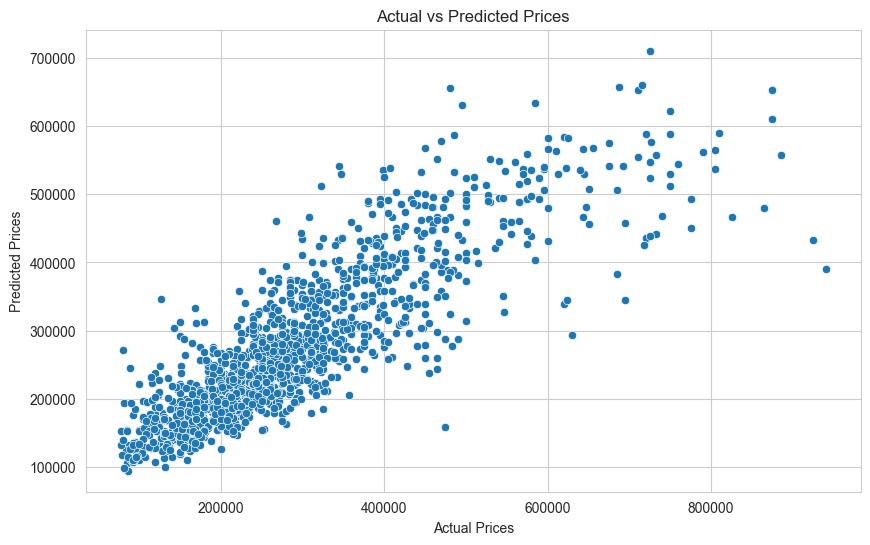

In [24]:
# plot the test set predictions vs actuals
# use
# y_test_gbp 
# y_pred_gbp 

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_gbp, y=y_pred_gbp)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


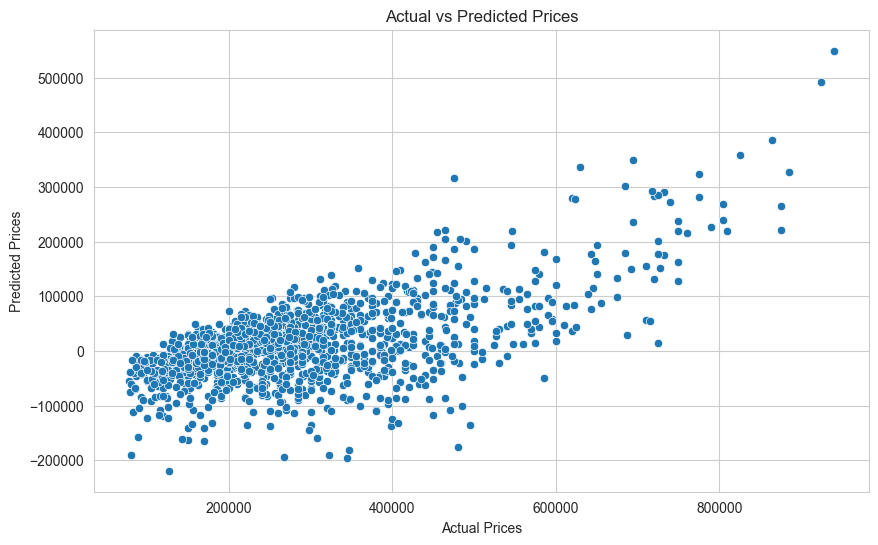

In [25]:
# plot the residuals
residuals = y_test_gbp - y_pred_gbp
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_gbp, y=residuals)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [14]:
# save the test set for future evaluation
test.to_csv('../data/clean/test_set.csv', index=False)


# Section 2

Section 2 content